### Early Stopping 
    -is another regularization technique that can be used to reduce overfitting in neural networks. But it is not limited to neural networks and can also be used with other machine learning models.
    
The idea behind early stopping is straightforward. We intentionally stop the training process of the model early right before the model begins to overfit.

The key challenge in early stopping is to identify the region where the model begins to overfit. For this, we need to monitor the training process. That can be achieved by plotting the training error and test (validation) error against the number of epochs during the training.
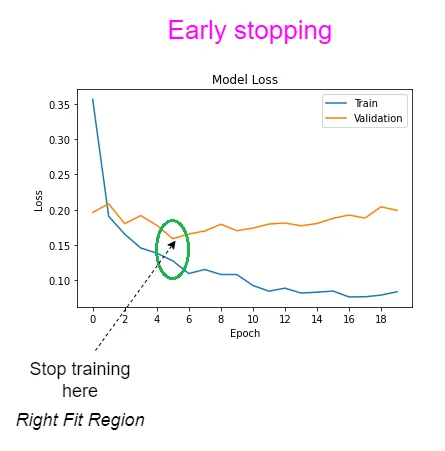

Ref-https://medium.com/data-science-365/using-early-stopping-to-reduce-overfitting-in-neural-networks-7f58180caf5b

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

In [2]:
# data
np.random.seed(42)

m = 1000 # number of instances
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

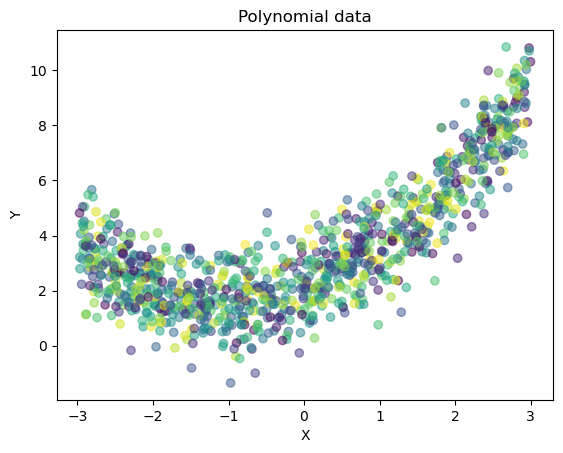

In [3]:
# let's see our generated data distribution
colors = np.random.rand(m)
plt.scatter(X,y, alpha=0.5, c=colors)
plt.title("Polynomial data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
# data split
X_train, X_mid, y_train, y_mid = train_test_split(X, y, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_mid, y_mid, test_size=0.5)

print(len(X_train))
print(len(X_valid))
print(len(X_test))

print(len(y_train))
print(len(y_valid))
print(len(y_test))

700
150
150
700
150
150


In [5]:
preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False), StandardScaler()
)

In [6]:
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.fit_transform(X_valid)
X_test_prep = preprocessing.fit_transform(X_test)

In [7]:
# model
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
best_model = None

#### partial_fit 
    also retains the model between calls, but differs: with warm_start the parameters change and the data is (more-or-less) constant across calls to fit; with partial_fit, the mini-batch of data changes and model parameters stay fixed.
    Ref-https://datascience.stackexchange.com/questions/68599/incremental-learning-with-sklearn-warm-start-partial-fit-fit

In [8]:
# early stropping 

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    valid_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if( valid_error < best_valid_rmse):
        best_valid_rmse = valid_error
        best_model = deepcopy(sgd_reg)

In [9]:
best_model

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

In [11]:
y_predicted = best_model.predict(X_test_prep)
test_error = mean_squared_error(y_test, y_predicted, squared=False)
print(f"Test error: {test_error}")

Test error: 0.9845999916555233
